Performing Grid Search for Random Forest...

Best parameters for Random Forest: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Best cross-validation score for Random Forest: 0.41849977956458756

Plotting learning curve...


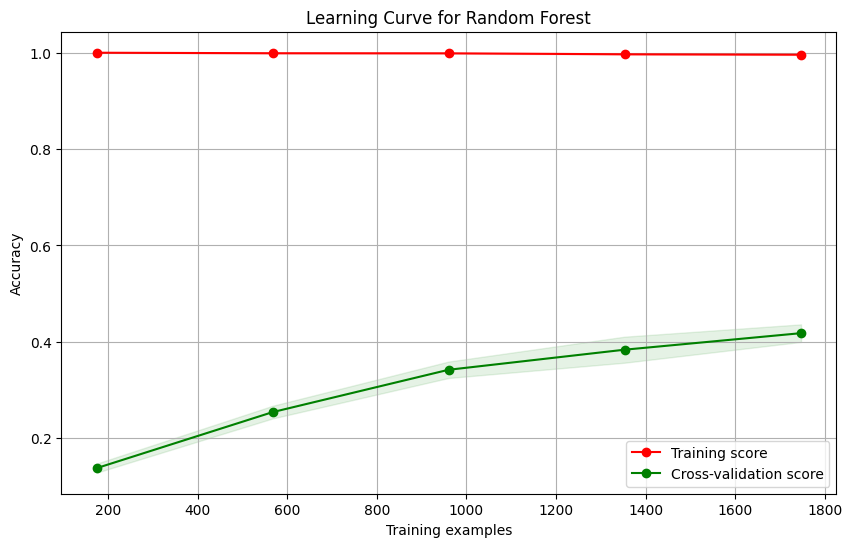


Test Set Results:
Accuracy: 0.4084
Log-loss: 3.9787
F1-score: 0.3865

Classification Report:
               precision    recall  f1-score   support

     Abundant       0.00      0.00      0.00         3
       Active       0.00      0.00      0.00         3
        Adult       0.33      0.33      0.33         3
        Agile       0.67      0.67      0.67         3
     Alluring       1.00      0.33      0.50         3
      Amiable       0.33      0.33      0.33         3
      Amusing       0.25      0.33      0.29         3
      Aqueous       0.00      0.00      0.00         3
 Aristocratic       0.67      0.67      0.67         3
     Aromatic       0.33      0.33      0.33         3
     Artistic       0.67      0.67      0.67         3
Authoritative       0.00      0.00      0.00         3
       Bitter       0.33      0.33      0.33         3
      Bitterl       0.60      1.00      0.75         3
         Bold       1.00      0.33      0.50         3
       Bright       0.50 

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model Performance:
Training set score: 0.9945
Test set score: 0.4084
The model might be overfitting.

Feature ranking:
1. RGB2_B (0.115930)
2. RGB1_B (0.113705)
3. RGB2_R (0.112861)
4. RGB1_R (0.111177)
5. RGB3_G (0.110147)
6. RGB3_R (0.109506)
7. RGB2_G (0.109335)
8. RGB3_B (0.108969)
9. RGB1_G (0.108368)


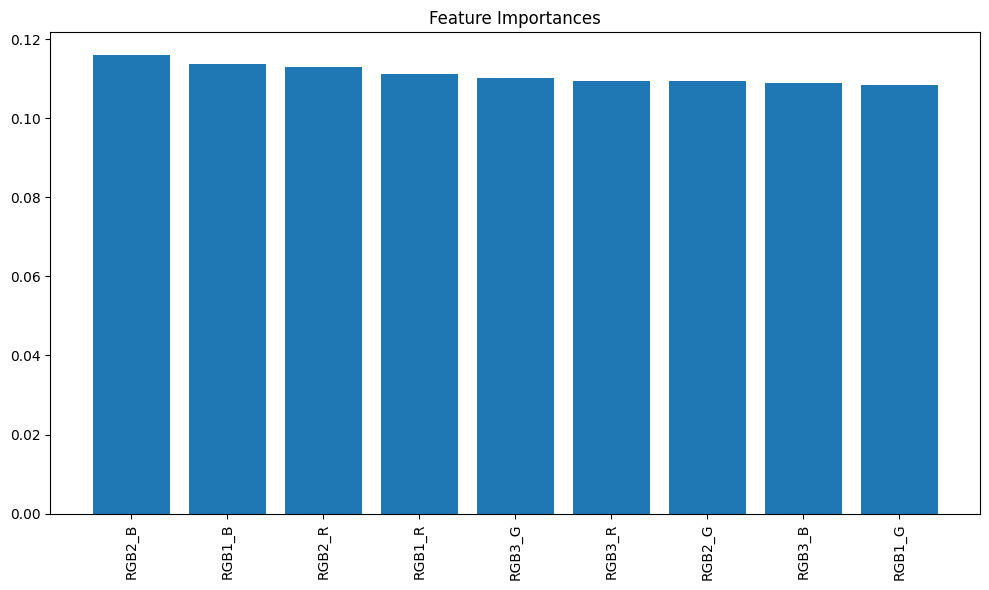

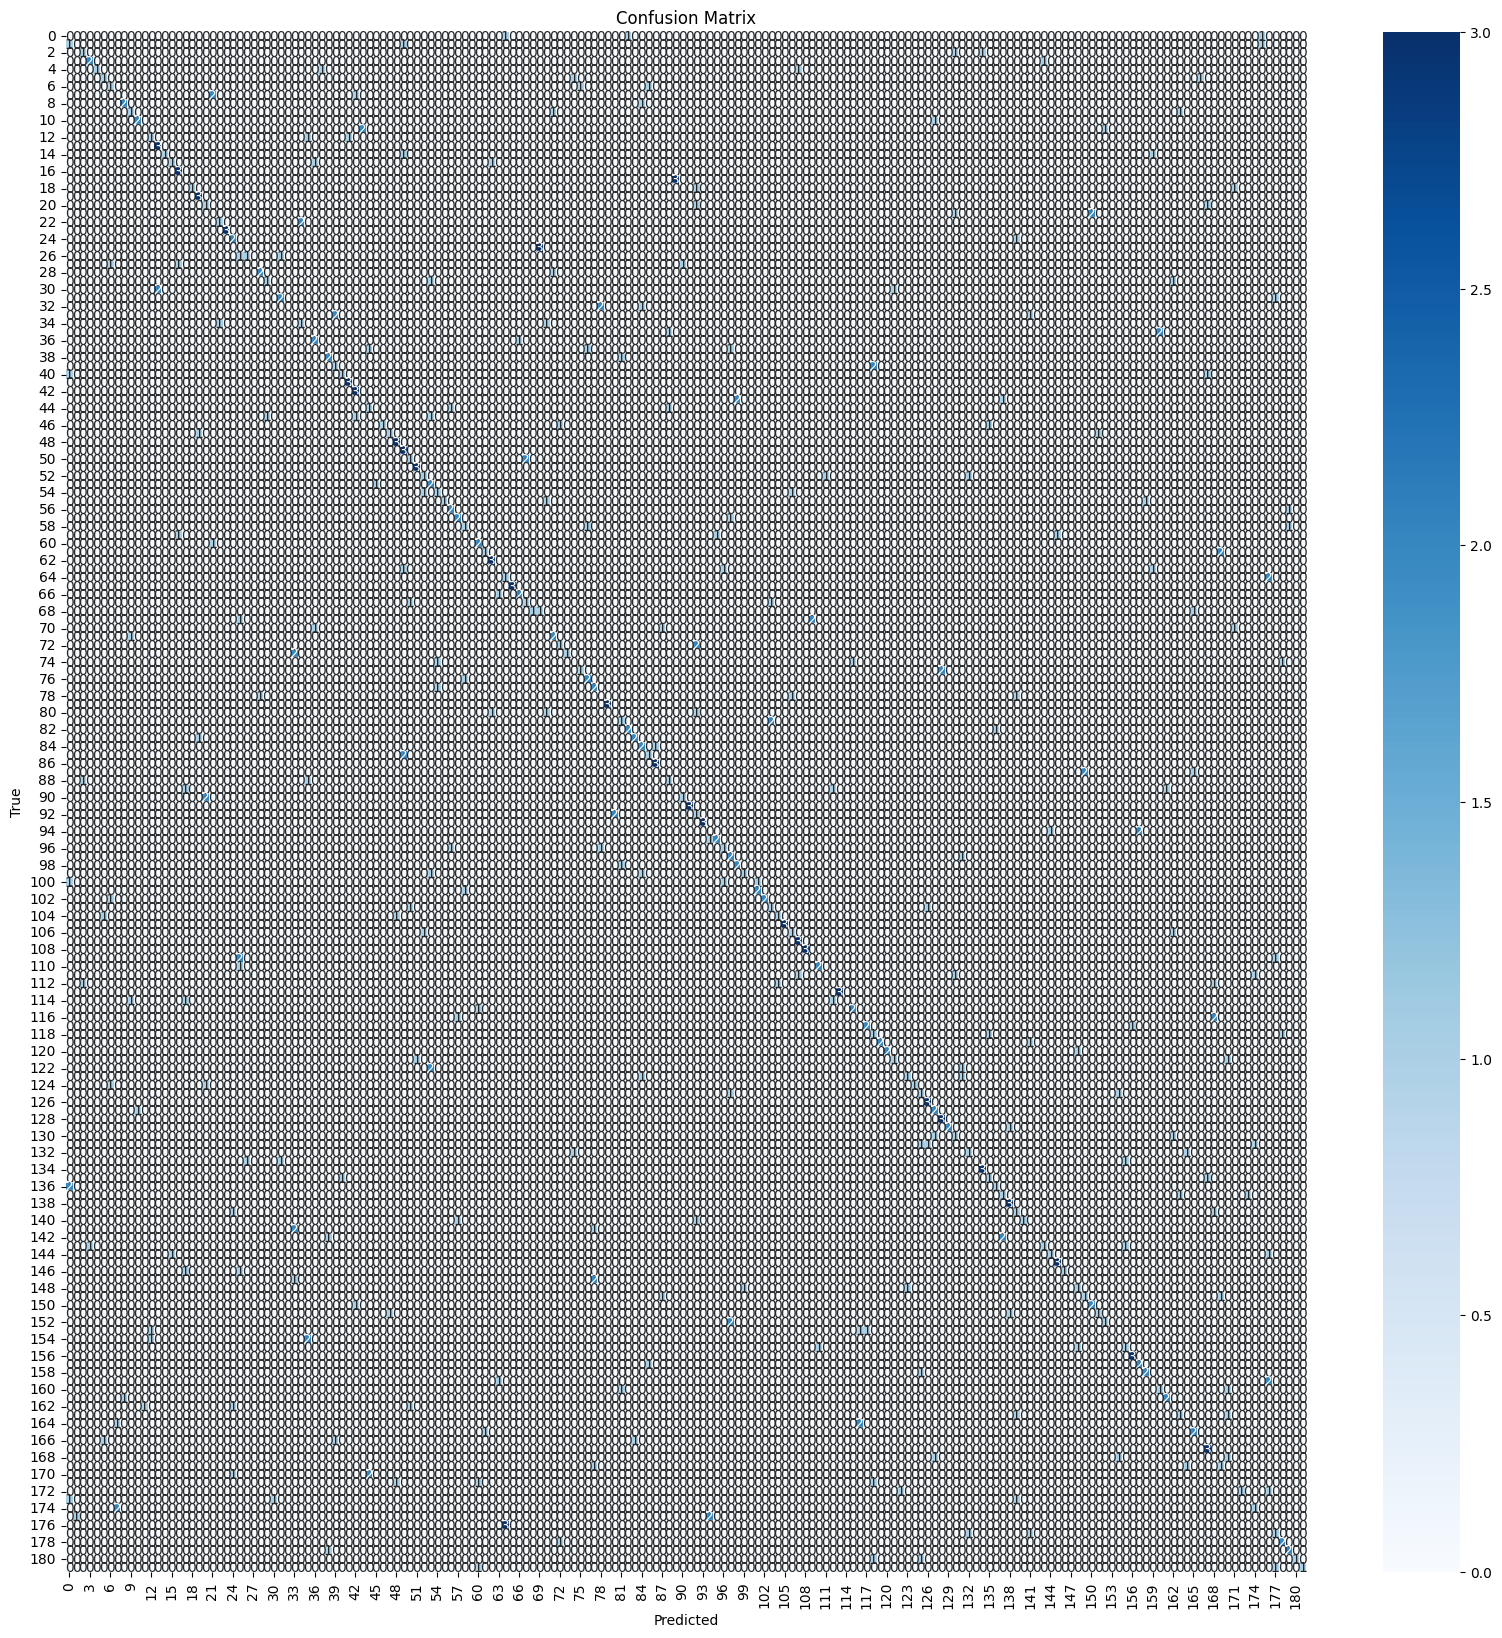

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss, f1_score, classification_report
import seaborn as sns

# Load and preprocess the data
data = pd.read_csv('resampled_dataset.csv')
X = data.iloc[:, :-1].values / 255.0
y = data.iloc[:, -1].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def perform_grid_search(model, param_grid, X, y):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='accuracy', verbose=2)
    grid_search.fit(X, y)
    return grid_search

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.grid()
    
    plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                     np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1, color="r")
    plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                     np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1, color="g")
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()

# Define parameter grid for Random Forest
rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [5, 10, 15, 20],  # Limit max_depth to prevent overfitting
    'rf__min_samples_split': [5, 10, 15],  # Increase min_samples_split
    'rf__min_samples_leaf': [2, 4, 6],  # Increase min_samples_leaf
    'rf__max_features': ['sqrt', 'log2'],
    'rf__class_weight': ['balanced', 'balanced_subsample']  # Add class weights
}

# Create Random Forest model with preprocessing pipeline
rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42, oob_score=True))  # Add oob_score for built-in cross-validation
])

# Perform grid search
print("Performing Grid Search for Random Forest...")
rf_grid_search = perform_grid_search(rf, rf_param_grid, X_train, y_train)

# Print best parameters and scores
print("\nBest parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation score for Random Forest:", rf_grid_search.best_score_)

# Plot learning curve
print("\nPlotting learning curve...")
plot_learning_curve(rf_grid_search.best_estimator_, X_train, y_train, "Learning Curve for Random Forest")

# Evaluate on the test set
best_rf = rf_grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)

print("\nTest Set Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Log-loss: {log_loss(y_test, y_pred_proba):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Check for overfitting/underfitting
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_test, y_test)

print("\nModel Performance:")
print(f"Training set score: {train_score:.4f}")
print(f"Test set score: {test_score:.4f}")
print(f"Out-of-bag score: {best_rf.named_steps['rf'].oob_score_:.4f}")

if train_score - test_score > 0.05:
    print("The model might still be overfitting, but less severely than before.")
elif test_score - train_score > 0.05:
    print("The model might be underfitting.")
else:
    print("The model seems to be well-balanced.")

# Feature importance
feature_importance = best_rf.named_steps['rf'].feature_importances_
feature_names = data.columns[:-1]  # Exclude the target column

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Print the feature ranking
print("\nFeature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], feature_importance[indices[f]]))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importance[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()